# ROS_Force

## Objectivos C1-C4

In [48]:
#Imports
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join




In [49]:
#Data Loading
path = "../Files/"
all_files = [file for file in listdir(path) if isfile(join(path, file))] # Adiciona o nome de todos os ficheiros numa lista
col_names = [n.split(".")[0] for n in all_files] # cria os nomes das colunas do Dataframe

df_from_each_file = (pd.read_csv(path+f) for f in all_files)
concatenated_df   = pd.concat(df_from_each_file, ignore_index=True, axis=1)

concatenated_df.columns = col_names

print(col_names)

['5m-parede', '5m-vidro', '1m-espelho', '10cm-parede', '1m-control-1px', '10m-vidro', '20cm-parede', '1m-vidro', '1m-parede', '7m-sl-parede', '1m-vidro1', '9m-parede', '10m-parede', '30cm-control-1px', '10m-control-1px', '2m-vidro', '20cm-vidro', '30cm-vidro', '3m-parede', '7m-parede']


In [50]:
#Data pre-processing


def standardizeData(df):
    # copy the dataframe
    df_std = df.copy()
    
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std
    

std_df = standardizeData(concatenated_df) #DataFrame com os dados "standardizados"



### Controlo

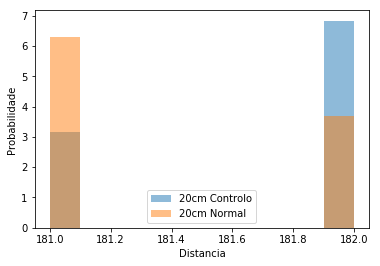

In [51]:
#Situacao Controlo a 20cm

plt.hist(concatenated_df["30cm-control-1px"].dropna(), bins=10, alpha=0.5, density=True, label="20cm Controlo")
plt.hist(concatenated_df["20cm-parede"].dropna(), bins=10, alpha=0.5, density=True, label="20cm Normal")
plt.legend()
plt.ylabel('Probabilidade');
plt.xlabel('Distancia');

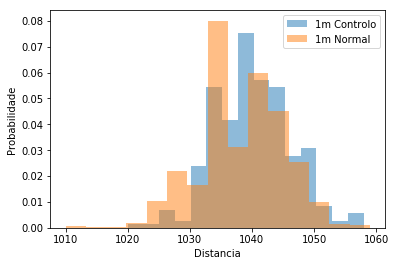

In [52]:
#Situacao Controlo a 1m

plt.hist(concatenated_df["1m-control-1px"].dropna(), bins=15, alpha=0.5, density=True, label="1m Controlo")
plt.hist(concatenated_df["1m-parede"].dropna(), bins=15, alpha=0.5, density=True, label="1m Normal")
plt.legend()
plt.ylabel('Probabilidade');
plt.xlabel('Distancia');


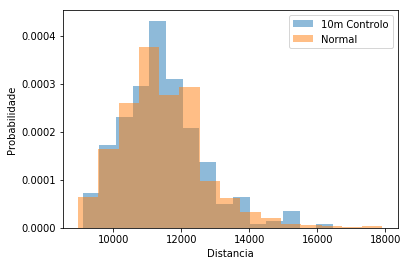

In [53]:
#Situacao Controlo a 10m
plt.hist(concatenated_df["10m-control-1px"].dropna(), bins=15, alpha=0.5, density=True, label="10m Controlo")
plt.hist(concatenated_df["10m-parede"].dropna(), bins=15, alpha=0.5, density=True, label="Normal")
plt.legend()
plt.ylabel('Probabilidade');
plt.xlabel('Distancia');

## Superficies opacas vs transparentes

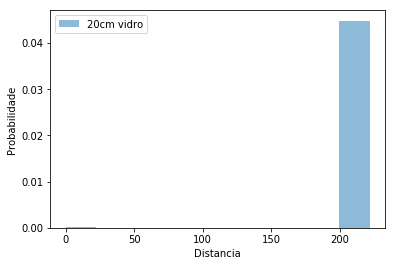

In [73]:
#vidro a 20cm

plt.hist(concatenated_df["20cm-vidro"].dropna(), bins=10, alpha=0.5, density=True, label="20cm vidro")
plt.legend()
plt.ylabel('Probabilidade');
plt.xlabel('Distancia');

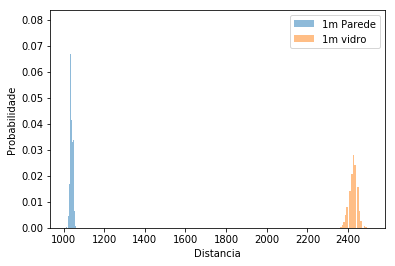

In [70]:
#Situacao Controlo a 10m
plt.hist(concatenated_df["1m-parede"].dropna(), bins=20, alpha=0.5, density=True, label="1m Parede")
plt.hist(concatenated_df["1m-vidro"].dropna(), bins=20, alpha=0.5, density=True, label="1m vidro")
plt.legend()
plt.ylabel('Probabilidade');
plt.xlabel('Distancia');

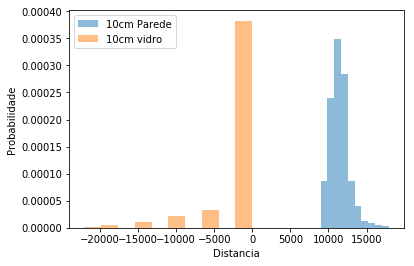

In [71]:
#Situacao Controlo a 10m
plt.hist(concatenated_df["10m-parede"].dropna(), bins=10, alpha=0.5, density=True, label="10cm Parede")
plt.hist(concatenated_df["10m-vidro"].dropna(), bins=10, alpha=0.5, density=True, label="10cm vidro")
plt.legend()
plt.ylabel('Probabilidade');
plt.xlabel('Distancia');